In [2]:
# imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import numpy as np

In [3]:
def get_data():
    x_train_ = pd.read_csv('X_train.csv').drop('id', axis=1)
    y_train_ = pd.read_csv('y_train.csv', usecols=['y'])
    x_test_ = pd.read_csv('X_test.csv').drop('id', axis=1)
    return x_train_, y_train_, x_test_

In [4]:
x_train, y_train, x_test = get_data()

## Missing Values
-for each feature we have less then 10% missing values

In [5]:
# replace missing values with the median
x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_test.median())

## Center data

In [6]:
def center_data(x_data_):
    x_centered = x_data_.apply(lambda x: x - x.mean())
    return x_centered

In [11]:
x_train = center_data(x_train)
x_test = center_data(x_test)

# Visualize features

## Describe statistics

In [12]:
x_train.iloc[:,100:110].describe()

,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109
count,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1212.0,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03
mean,-2.618925e-13,4.772596e-13,-1.328222e-13,7.744212e-12,0.0,2.037241e-16,-2.701469e-14,-2.418308e-17,1.399687e-16,1.122611e-12
std,4.091972e+02,8.329506e+02,2.732573e+01,9.708732e+03,0.0,2.713047e-01,9.709472e+01,1.751391e-01,9.708804e-01,2.690057e+02
min,-1.173253e+03,-3.558197e+03,-5.014333e+01,-3.530128e+04,0.0,-5.333351e-01,-3.073572e+02,-7.048223e-01,-3.276926e+00,-5.031119e+02
25%,-2.695443e+02,-4.657801e+02,-2.222222e+01,-5.628933e+03,0.0,-2.093928e-01,-5.868840e+01,-9.598839e-02,-6.234309e-01,-2.103921e+02
50%,-2.259022e+01,-4.478946e+01,6.416270e-01,-6.956471e+01,0.0,-4.801443e-03,-1.628999e+00,1.043678e-02,3.660722e-02,-2.453983e+00
75%,2.355116e+02,5.159895e+02,2.270575e+01,5.391041e+03,0.0,2.106330e-01,6.195234e+01,1.033538e-01,6.119864e-01,2.089400e+02
max,1.744931e+03,4.584950e+03,4.928046e+01,3.213655e+04,0.0,5.414504e-01,3.989256e+02,6.394402e-01,3.034977e+00,4.932900e+02


## Boxplots

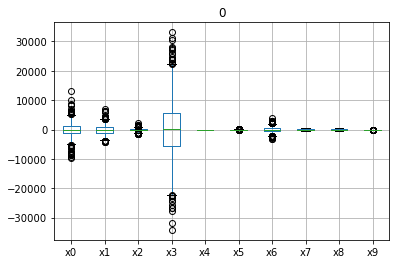

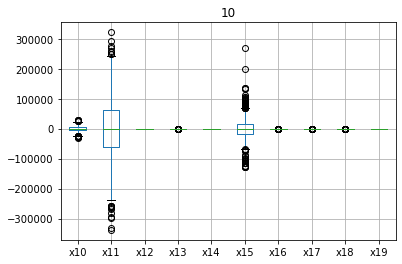

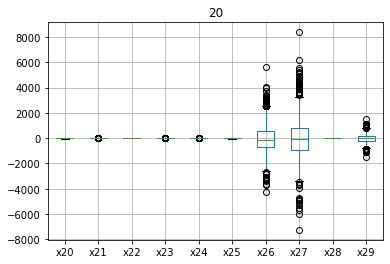

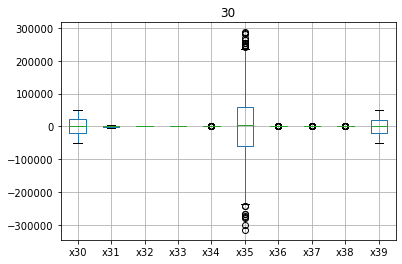

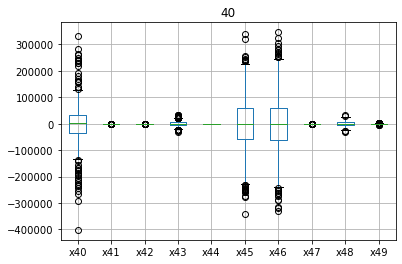

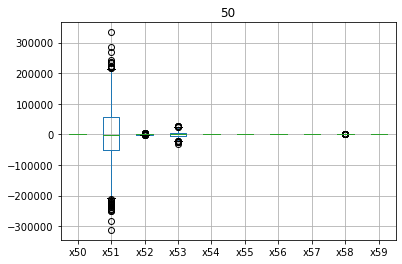

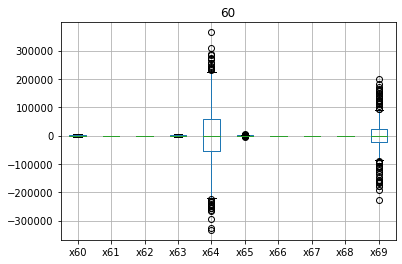

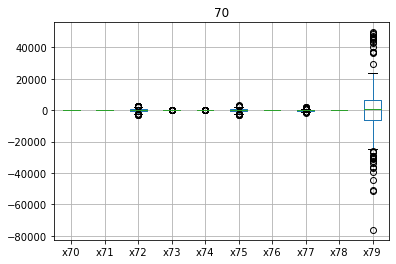

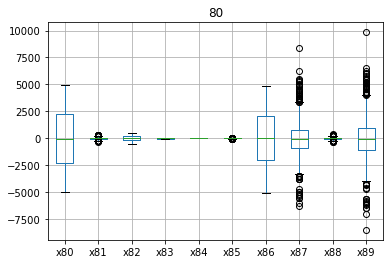

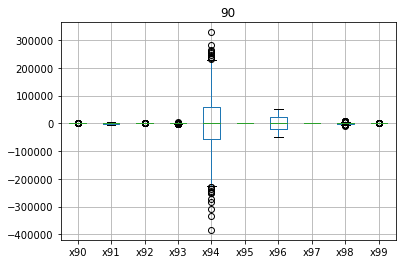

In [13]:
#boxplot of featues
for i in range(10):
    plt.figure()
    plt.title(i*10)
    x_train.iloc[:, i*10:(i+1)*10].boxplot()

## Histograms

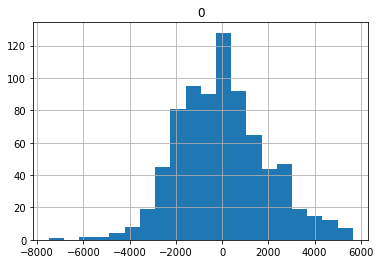

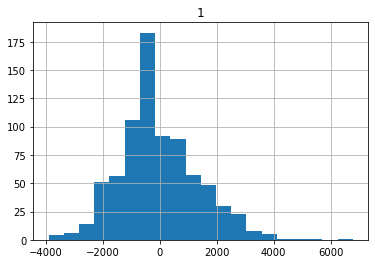

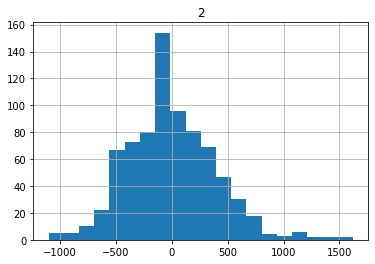

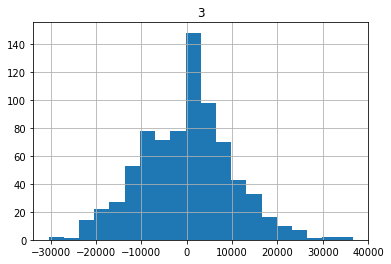

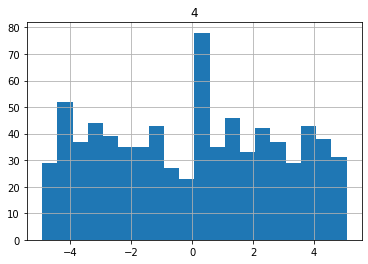

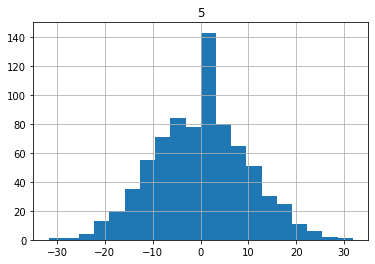

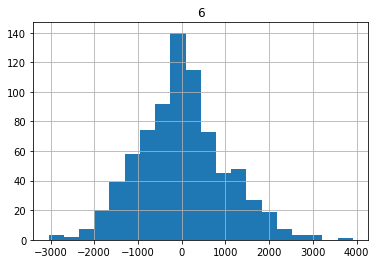

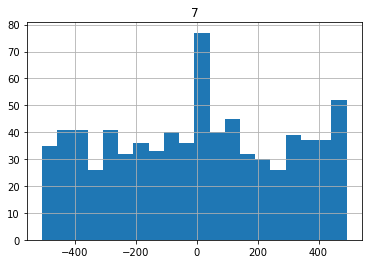

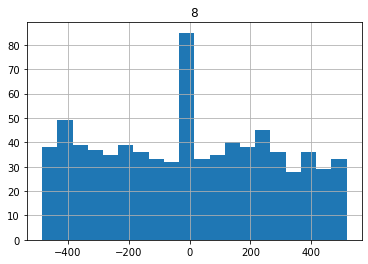

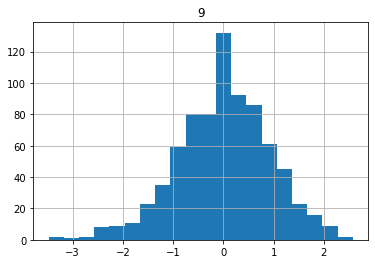

In [15]:
#histogram plot of features
for i in range(10):
    plt.figure()
    plt.title(i)
    x_test.iloc[:,i].hist(bins = 20)

## label histogram

'\ny = y_train.to_numpy().reshape(-1)\ny_hist = np.histogram(y, bins = 55)\ny_hist\n'

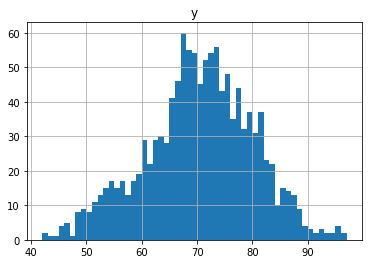

In [9]:
# age distribution of the training set 
# --> should we do something to balance this?
y_train.hist(bins=55)

# histogram arrray:
'''
y = y_train.to_numpy().reshape(-1)
y_hist = np.histogram(y, bins = 55)
y_hist
'''

## find all features with uniform looking histograms

when looking at the histograms one can notice that some features have uniform looking distributions. From a statistical perspective such features have no information value for predictions. Therfore it might my usefull to remove those features.

In [10]:
#removes features which have zero std_deviation
def remove_zero_std_features(x_train_, x_test_):
    zero_std = (x_train_.std() > 0.0)
    print("we remove ", x_train_.shape[1]-zero_std.sum(), "features")
    x_train_ = x_train_.loc[:, zero_std]
    x_test_ = x_test_.loc[:, zero_std]
    return x_train_, x_test_

x_train, x_test = remove_zero_std_features(x_train, x_test)

we remove  4 features


In [12]:
x = x_train.to_numpy()
chi_test = np.zeros(x.shape[1]) #stores a 1 if the feature is uniform like

#does the xhi_squared test for each feature and stores a 1 in test if p_value > 0.05
for i in range(x.shape[1]):
    hist = np.histogram(x[:,i], bins = 20)[0]
    hist = np.delete(hist,hist.argmax())
    unif = np.ones_like(hist)*hist.sum()/hist.shape
    if (chisquare(hist,unif).pvalue > 0.05):
        chi_test[i] = 1

print("we remove ", chi_test.sum(), "uniform looking features")
unif_cols_indicies = chi_test.nonzero()[0] #indices of uniform features
unif_cols_names = x_train.columns[unif_cols_indicies] #data frame column names of uniform features
x_train = x_train.drop(unif_cols_names, axis = 1) # drops these columns

we remove  217.0 uniform looking features


we found 217 features with uniform looking histograms. I ovserved this by measuring the p_value of the chi_squared test on the features. Note that I excluded the maximum value in each histogram as this value appears way more the all the other values (TODO: think about the consequenses of this later on!)
The indices which satisfy:
```python
test[i] == 1
```
are also the indices of the features which have histogram looking distributions.

## Standardization

In [15]:
# standardization of the data
std_scaler = StandardScaler()
# fit and transform the data
x_train = pd.DataFrame(std_scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(std_scaler.fit_transform(x_test), columns=x_test.columns)

In [17]:
x_train.describe()

,x0,x1,x2,x3,x5,x6,x9,x10,x11,x12,...,x821,x822,x823,x824,x826,x827,x828,x829,x830,x831
count,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,...,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03,1.212000e+03
mean,2.345026e-16,-3.693415e-16,1.113887e-16,-7.709271e-16,7.973087e-16,3.253723e-16,1.049399e-15,-9.145600e-16,1.069918e-15,1.876020e-15,...,-3.488225e-16,2.872656e-16,-2.301056e-16,-6.448820e-16,4.632891e-15,2.931282e-17,-9.592620e-16,-6.741948e-17,2.867527e-15,-1.090437e-15
std,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,...,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00,1.000413e+00
min,-4.300335e+00,-2.758410e+00,-3.699294e+00,-3.662235e+00,-3.214312e+00,-3.386698e+00,-3.364267e+00,-3.398571e+00,-3.487781e+00,-1.951372e+00,...,-3.548178e+00,-3.189244e+00,-4.399736e+00,-3.725260e+00,-1.881077e+00,-3.456121e+00,-4.481054e+00,-2.733686e+00,-1.855360e+00,-3.696974e+00
25%,-5.731838e-01,-6.706906e-01,-6.051059e-01,-6.051440e-01,-6.223437e-01,-5.905007e-01,-6.355348e-01,-5.958208e-01,-6.222843e-01,-7.673041e-01,...,-6.276017e-01,-6.352240e-01,-5.712372e-01,-6.268030e-01,-8.068560e-01,-5.968869e-01,-6.617214e-01,-6.491470e-01,-7.773808e-01,-6.147722e-01
50%,-7.145276e-02,-6.800054e-02,-6.364537e-02,5.106016e-03,-3.015414e-02,7.775947e-03,-1.470019e-02,-1.564587e-02,3.270860e-03,-7.458227e-03,...,6.351041e-04,-4.430804e-03,-5.103376e-02,-1.077790e-01,2.470133e-02,-4.318818e-02,-5.666261e-02,8.588075e-03,5.045586e-02,1.191406e-04
75%,5.742737e-01,5.337673e-01,5.608900e-01,5.921049e-01,5.892815e-01,5.398102e-01,6.486286e-01,6.544077e-01,6.353260e-01,8.124101e-01,...,6.075528e-01,6.244993e-01,5.589153e-01,5.804599e-01,7.871111e-01,5.248272e-01,5.701662e-01,6.158916e-01,8.424819e-01,6.205745e-01
max,5.870837e+00,4.512058e+00,5.139850e+00,3.551036e+00,3.265813e+00,4.126896e+00,4.010411e+00,3.180974e+00,3.319438e+00,1.960935e+00,...,3.607051e+00,3.345986e+00,5.584465e+00,4.491210e+00,1.860294e+00,4.841199e+00,4.232236e+00,4.494558e+00,1.689624e+00,3.374899e+00
